# Let's draw random knots?

Trying to draw randomized knots using rope relaxation. For now, the results are not too encouraging.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

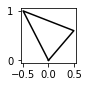

In [201]:
def prettyfig(xy, figsize=None, color='k-', fig=None):
    if figsize is None: figsize = (5,5)
    fig = plt.figure(figsize=figsize)
    fig.patch.set_facecolor('white') # To make copying possible (no transparent background)
    #plt.xticks([]); # Uncomment in the future
    #plt.yticks([]);
    #plt.axis('off')
    
    n,_ = xy.shape
    ii = list(range(n))+[0]
    plt.plot(xy[ii,0], xy[ii,1], color);
    
prettyfig(np.array([[0,0],[-0.5,1],[0.5,0.6]]), (1,1))

In [329]:
def cosinify(t, omegas, phases, amplitudes):
    out = np.zeros((1,2))
    for i in range(len(omegas)):
        out += np.array([np.cos(omegas[i]*t + phases[i]), 
                         np.sin(omegas[i]*t + phases[i])])*amplitudes[i]
    return out

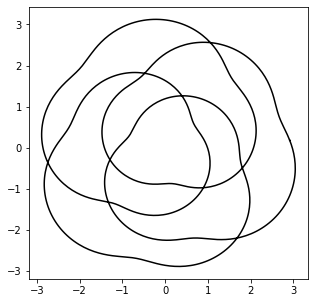

In [415]:
n_points = 1000

omegas = [1,4,16]
phases = [0,0,2]
amplitudes = [1,2,0.2]

xy = np.zeros((n_points,2))
for i in range(n_points):
    t = i*2*np.pi/n_points
    xy[i,:] = cosinify(t, omegas, phases, amplitudes)
    

prettyfig(xy)

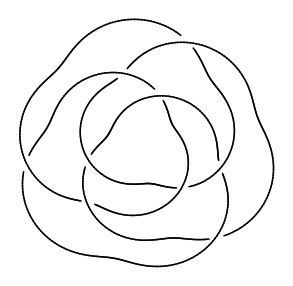

In [429]:
def knotfig(xy, figsize=None):
    """Knot-figure"""
    if figsize is None: figsize=(5,5)
    fig = plt.figure(figsize=figsize)
    fig.patch.set_facecolor('white') # To make copying possible (no transparent background)
    plt.xticks([]); # Uncomment in the future
    plt.yticks([]);
    plt.axis('off')    
    n,_ = xy.shape
    gap_width = 0.02
    flank_zone = 20
    count = 0
    intersection_zone = False
    for i in range(n):
        j = (i+1) % n
        dist = np.sum(np.square(xy-xy[i,:]), axis=1)
        is_intersection = False
        for k in range(n):
            if i>flank_zone and i<n-flank_zone and abs(k-i)>flank_zone and dist[k]<gap_width:
                is_intersection = True
                competing_i = k
        if not intersection_zone and is_intersection:
            count += 1
        intersection_zone = is_intersection
        if intersection_zone:
            #if (competing_i>i and (count % 2 == 0)) or (competing_i<i and (count % 2 == 1)):
            if count % 2 == 0:
                # stop drawing
                pass
            else:
                plt.plot(xy[[i,j],0], xy[[i,j],1], 'k-');  
        else:
            plt.plot(xy[[i,j],0], xy[[i,j],1], 'k-');  
    
knotfig(xy)

In [353]:
# Backup:
xy2 = xy.copy()

In [354]:
np.einsum('ij,ij->i', np.array([[0,1],[1,0]]), np.array([[0,1],[-1,1]]))

array([ 1, -1])

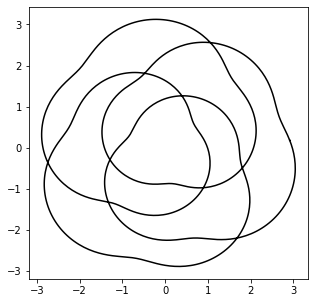

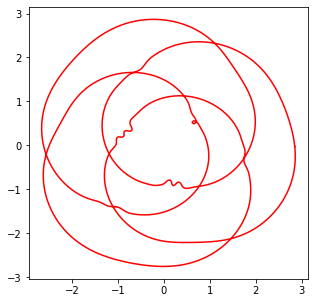

In [431]:
def noisify(xy, sigma=None):
    """Add 2d noise"""
    if sigma is None: sigma = np.std(xy)/100
    return xy + np.random.normal(size=xy.shape)*sigma

def relax(xy, nsteps=1, meandist=None):
    """Ribbon-like relaxation?"""
    alpha = 0.1
    v_decay = 0.7
    smoother = 0.1
    v = np.zeros(xy.shape)
    for istep in range(nsteps):
        deltas = xy-np.roll(xy, 1, axis=0) # Current minus previous
        dist = np.sqrt(np.sum(np.square(deltas),axis=1))
        if meandist is None:
            meandist = np.mean(dist)
        fval = dist/meandist-1
        #fval = np.piecewise(fval, fval>1, [lambda x:x, lambda x: np.square(x)])
        f = deltas/np.expand_dims(dist+0.00001, axis=1)*np.expand_dims(fval, axis=1)
        v = v*v_decay + (np.roll(f, -1, axis=0) - f)*alpha # Negative own, positive next
        xy += v*alpha
        xy = xy*(1-2*smoother) + smoother*(np.roll(xy, -1, 0) + np.roll(xy, 1, 0))
    return xy

np.random.seed(1)
xy = xy2.copy()
prettyfig(xy)
xy = noisify(xy, 0.01)
xy = relax(xy, 1000)
prettyfig(xy, color='r-');
#xy = relax(xy, 1)
#prettyfig(xy);